In [7]:
from neural_implementation import neural_classification as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
# UCITAVANJE PODATAKA I TESTIRANJE

df = pd.read_csv('../datasets/iris_extended.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
N = df.shape[0]
print(f'Ukupan broj podataka: {N}')

m = df.shape[1] - 1
print(f'Broj atributa svakog podatka: {m}')

attributes = list(df.drop('variety', axis=True).columns)
print(f'Atributi: {attributes}')

Ukupan broj podataka: 250
Broj atributa svakog podatka: 4
Atributi: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']


In [ ]:
attr1 = 'petal.length'
attr2 = 'petal.width'
attributes = [attr1, attr2]
m = len(attributes)

In [ ]:
N = df.shape[0]
print(f'Velicina skupa podataka: {N}')

X = np.ones((N, m + 1))
X[:, 1] = df[attr1]
X[:, 2] = df[attr2]

y_tmp = df['variety']

Velicina skupa podataka: 250


In [13]:
classes = df['variety'].unique()
n_classes = len(classes)

print(f'Klase: {classes}')
print(f'Broj klasa: {n_classes}\n')

name_to_class_dict = dict(zip(classes, range(n_classes)))
class_to_name_dict = dict(zip(range(n_classes), classes))

print(f'Mapiranje imena klasa u numericke vrednosti:')
for name, cls in name_to_class_dict.items():
    print(f'{name} -> {cls}')

print()
print(f'Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:')
for cls, name in class_to_name_dict.items():
    print(f'{cls} -> {name}')

Klase: ['Setosa' 'Versicolor' 'Virginica' 'Letosa' 'Helenica']
Broj klasa: 5

Mapiranje imena klasa u numericke vrednosti:
Setosa -> 0
Versicolor -> 1
Virginica -> 2
Letosa -> 3
Helenica -> 4

Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:
0 -> Setosa
1 -> Versicolor
2 -> Virginica
3 -> Letosa
4 -> Helenica


In [ ]:
mapper_cls_to_vec = {}
for i in range(n_classes):
    vec = np.zeros((n_classes,))
    vec[i] = 1
    
    mapper_cls_to_vec[i] = vec
    
print('Mapiranje numericke vrednosti u odgovarajuci vektor:')
for cls, vec in mapper_cls_to_vec.items():
    print(f'{cls} -> {vec}')

Mapiranje numericke vrednosti u odgovarajuci vektor:
0 -> [1. 0. 0. 0. 0.]
1 -> [0. 1. 0. 0. 0.]
2 -> [0. 0. 1. 0. 0.]
3 -> [0. 0. 0. 1. 0.]
4 -> [0. 0. 0. 0. 1.]


In [ ]:
y = np.zeros((N, n_classes))
for i in range(N):
    cls = name_to_class_dict[y_tmp[i]]
    y[i] = mapper_cls_to_vec[cls]

In [ ]:
print(f'Podaci:')
print(X[:10])
print(' ...')

print(f'Ciljne promenljive:')
print(y[:10])
print(' ...')

Podaci:
[[1.  1.4 0.2]
 [1.  1.4 0.2]
 [1.  1.3 0.2]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.7 0.4]
 [1.  1.4 0.3]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.5 0.1]]
 ...
Ciljne promenljive:
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
 ...


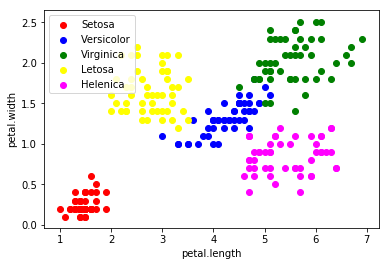

In [17]:
colors = ['red', 'blue', 'green', 'yellow', 'magenta']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)
    
plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [19]:
print(f'X_train:')
print(X_train)
print()

print(f'y_train:')
print(y_train)
print()

print(f'X_test:')
print(X_test)
print()

print(f'y_test:')
print(y_test)

X_train:
[[1.  2.6 1.8]
 [1.  1.2 0.2]
 [1.  2.6 1.4]
 [1.  2.7 1.7]
 [1.  4.8 0.6]
 [1.  2.3 1.7]
 [1.  1.3 0.3]
 [1.  4.1 1.3]
 [1.  6.1 1.9]
 [1.  4.3 1.3]
 [1.  4.7 1.4]
 [1.  4.3 1.3]
 [1.  2.  1.4]
 [1.  6.  1.8]
 [1.  5.6 1.8]
 [1.  4.4 1.3]
 [1.  5.  2. ]
 [1.  4.8 0.7]
 [1.  1.7 0.4]
 [1.  1.5 0.2]
 [1.  6.1 2.3]
 [1.  6.4 0.7]
 [1.  6.6 2.1]
 [1.  3.3 2.1]
 [1.  5.9 2.3]
 [1.  5.7 2.3]
 [1.  3.1 2.1]
 [1.  6.1 2.5]
 [1.  1.6 0.2]
 [1.  5.9 2.1]
 [1.  4.2 1.5]
 [1.  4.6 0.6]
 [1.  1.5 0.3]
 [1.  5.1 1.9]
 [1.  3.9 1.2]
 [1.  6.2 0.9]
 [1.  4.9 1.8]
 [1.  4.7 0.8]
 [1.  5.6 2.4]
 [1.  4.8 0.8]
 [1.  5.2 0.5]
 [1.  5.6 0.7]
 [1.  4.5 1.5]
 [1.  6.  1. ]
 [1.  4.8 0.9]
 [1.  2.6 1.5]
 [1.  2.7 1.3]
 [1.  4.9 1.5]
 [1.  4.7 1.1]
 [1.  5.1 1.8]
 [1.  6.7 2.2]
 [1.  2.8 1.6]
 [1.  6.  2.5]
 [1.  6.4 0.7]
 [1.  3.2 1.3]
 [1.  1.4 0.2]
 [1.  5.9 0.6]
 [1.  1.3 0.2]
 [1.  4.5 1.5]
 [1.  4.6 1.5]
 [1.  2.1 1.8]
 [1.  1.5 0.4]
 [1.  5.3 2.3]
 [1.  3.2 1.5]
 [1.  5.1 2.4]
 [1.  1.4 0.3]
 

In [ ]:
X_train_first = X_train[0].reshape(1, -1)
y_train_first = y_train[0].reshape(1, -1)

In [22]:
nn1 = nc.NeuralNetwork(m, [3*m], n_classes)

nn1.print_network()
print()

nn1.print_layer_mapper_sizes()
print()

nn1.print_model()

~ Neural network ~
Layer 1:
[1. 1. 1.]
Layer 2:
[1. 1. 1. 1. 1. 1. 1.]
Layer 3:
[1. 1. 1. 1. 1.]

Dimenzije matrica modela koji mapiraju slojeve:
0 -> 1: 6 x 3
1 -> 2: 5 x 7

Model:
W_0: 0 -> 1
[[-0.978057   -0.40071247  0.76990552]
 [-0.48718631  0.16312474  0.815712  ]
 [-0.99059572 -0.12755433 -0.85582963]
 [ 0.76328254 -0.79514146 -0.76697649]
 [-0.96376269  0.62403167  0.94850023]
 [ 0.23455588 -0.80479173 -0.42477597]]
W_1: 1 -> 2
[[-0.142372   -0.42750074 -0.75645094  0.67745376 -0.0794963  -0.43658758
  -0.70637695]
 [-0.20023891  0.505102   -0.01332795  0.31553817  0.43460358  0.03708292
  -0.09995639]
 [ 0.17673646  0.11930431  0.67282293 -0.66954009 -0.91739741  0.46094256
  -0.11420579]
 [ 0.39806988  0.3751722  -0.03533974  0.63894607  0.18822684  0.04315139
  -0.85672217]
 [ 0.36074053 -0.04252379 -0.79726378  0.17521952  0.4132663  -0.07899895
   0.67183109]]


In [23]:
loss, gradient = nn1.backpropagation(X_train_first, y_train_first)
grad_approx = nc.gradient_checking(X_train_first, y_train_first, nn1.model)

diff = abs(gradient - grad_approx)
print('|gradient - grad_approx|:')
print(diff)

|gradient - grad_approx|:
[3.24669028e-10 5.71109076e-09 1.89522237e-09 2.60789110e-09
 4.58438916e-08 1.52116576e-08 1.77156298e-09 3.11347985e-08
 1.03307448e-08 1.97540596e-09 3.47196355e-08 1.15204263e-08
 1.33345487e-09 2.34373192e-08 7.77685125e-09 2.73282382e-09
 4.80306495e-08 1.59372915e-08 1.60376756e-08 6.67632158e-10
 8.30434443e-09 2.36129345e-12 4.09824952e-12 1.22534952e-08
 4.79139471e-12 7.50935536e-10 3.15314996e-11 3.88854171e-10
 2.56409477e-13 2.26915708e-13 5.73968095e-10 1.11785581e-14
 1.55367293e-08 6.46876885e-10 8.04521660e-09 2.14526313e-12
 4.14875079e-12 1.18708334e-08 5.35059497e-12 1.00312743e-08
 4.17298585e-10 5.19417437e-09 1.48345225e-12 2.84268442e-12
 7.66429609e-09 3.00757336e-12 5.78092602e-09 2.40688941e-10
 2.99326119e-09 9.89583415e-13 1.40052900e-12 4.41695613e-09
 1.74710593e-12]


In [25]:
lambdas = [0] + [0.01 * (1.5**i) for i in range(8)]
print('lamda parameters:')
print(lambdas)

lamda parameters:
[0, 0.01, 0.015, 0.0225, 0.03375, 0.050625, 0.0759375, 0.11390625, 0.170859375]


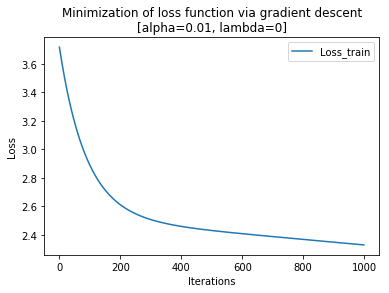

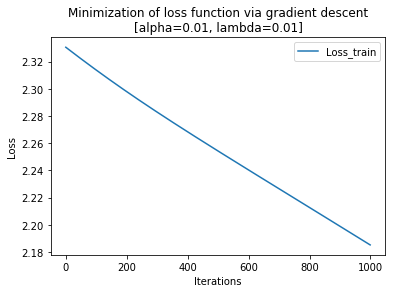

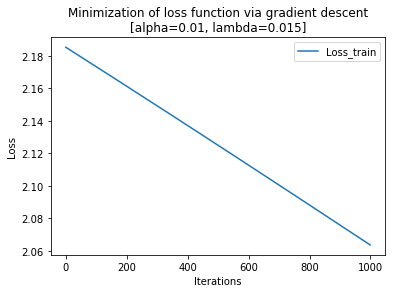

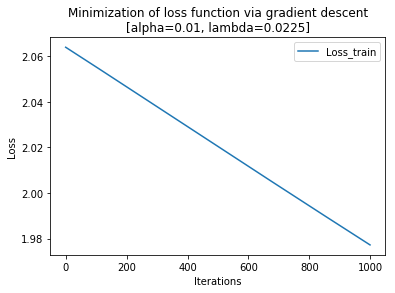

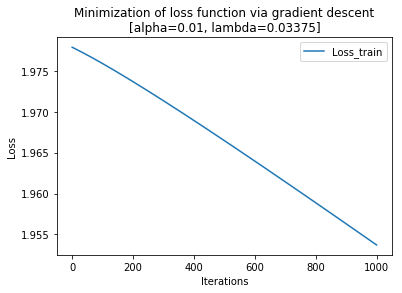

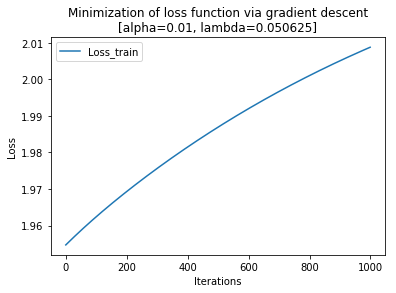

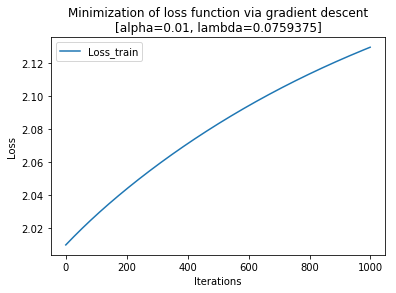

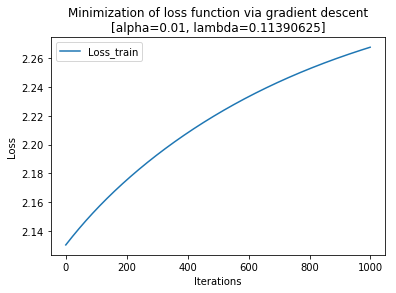

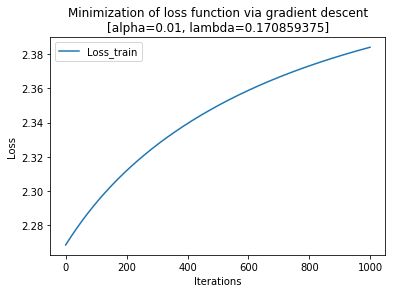

In [26]:
classifiers = [nn1.fit(X_train, y_train, alpha=0.01, lambda_param=lambda_param, plot=True) 
               for lambda_param in lambdas]

In [27]:
losses_test = [clf.loss(X_test, y_test) for clf in classifiers]

print('Funkcije gubitka za svaki klasifikator posebno na test skupu:')
for i in range(len(losses_test)):
    print(f'Klasifikator {i}: loss = {losses_test[i]}')

Funkcije gubitka za svaki klasifikator posebno na test skupu:
Klasifikator 0: loss = 2.334485490665139
Klasifikator 1: loss = 2.1930392586558884
Klasifikator 2: loss = 2.0718627492730595
Klasifikator 3: loss = 1.984401480485117
Klasifikator 4: loss = 1.9591680118560975
Klasifikator 5: loss = 2.0128517900571294
Klasifikator 6: loss = 2.132780042340433
Klasifikator 7: loss = 2.270936207776574
Klasifikator 8: loss = 2.3872106369532338


In [ ]:
min_loss = float('inf')
best_clf1 = None
best_lambda = None

for i in range(len(losses_test)):
    if losses_test[i] < min_loss:
        min_loss = losses_test[i]
        best_clf1 = classifiers[i]
        best_lambda = lambdas[i]
        
print(f'Najmanji gubitak (na test skupu) za svaki klasifikator: {min_loss}')
print(f'Regularizacioni parametar lambda za koji je naucen najbolji model: '
      f'{best_clf1.lambda_learned}')

Najmanji gubitak (na test skupu) za svaki klasifikator: 1.9591680118560975
Regularizacioni parametar lambda za koji je naucen najbolji model: 0.03375


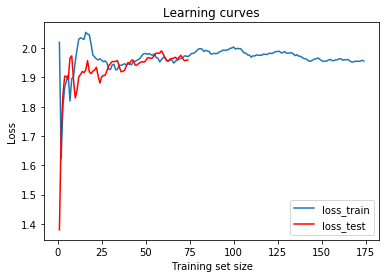

In [32]:
nc.plot_learning_curves(X_train, y_train, X_test, y_test, best_clf1)

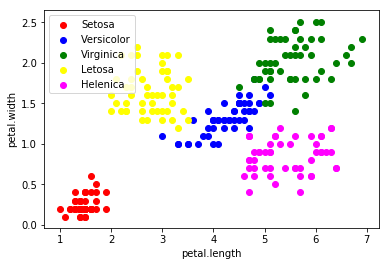

In [33]:
colors = ['red', 'blue', 'green', 'yellow', 'magenta']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)
    
plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [ ]:
x1 = np.array([1, 0.5, 0.4]) # Setosa
x2 = np.array([1, 4.2, 1.2]) # Versicolor
x3 = np.array([1, 5.5, 2]) # Virginca
x4 = np.array([1, 2.9, 1.9]) # Letosa
x5 = np.array([1, 5.2, 0.8]) # Helenica

In [53]:
y_predict1 = best_clf1.predict(x1)
y_predict2 = best_clf1.predict(x2)
y_predict3 = best_clf1.predict(x3)
y_predict4 = best_clf1.predict(x4)
y_predict5 = best_clf1.predict(x5)

print('~ TESTIRANJE KLASIFIKATORA ~')

print('Test 1:')
nc.Classifier.prediction_info(y_predict1, class_to_name_dict)
print()

print('Test 2:')
nc.Classifier.prediction_info(y_predict2, class_to_name_dict)
print()

print('Test 3:')
nc.Classifier.prediction_info(y_predict3, class_to_name_dict)
print()

print('Test 4:')
nc.Classifier.prediction_info(y_predict4, class_to_name_dict)
print()

print('Test 5:')
nc.Classifier.prediction_info(y_predict5, class_to_name_dict)
print()

~ TESTIRANJE KLASIFIKATORA ~
Test 1:
Prediction vector: [0.59476499 0.15963662 0.07444429 0.23088035 0.14480757]
Max prediction value: 0.5947649906669054 (atposition 0)
Class: Setosa

Test 2:
Prediction vector: [0.14510421 0.21057127 0.21821594 0.19967913 0.2191849 ]
Max prediction value: 0.21918489944226446 (atposition 4)
Class: Helenica

Test 3:
Prediction vector: [0.06831918 0.22339777 0.31772252 0.23100094 0.17611541]
Max prediction value: 0.3177225210416301 (atposition 2)
Class: Virginica

Test 4:
Prediction vector: [0.12388654 0.20165215 0.24431504 0.27985799 0.11737375]
Max prediction value: 0.2798579941757041 (atposition 3)
Class: Letosa

Test 5:
Prediction vector: [0.1592147  0.21806479 0.20635664 0.16132867 0.31252151]
Max prediction value: 0.31252151208844153 (atposition 4)
Class: Helenica



In [61]:
#####################################################################
################ PRAVLJENJE NOVE NEURALNE MREZE #####################
#####################################################################

nn2 = nc.NeuralNetwork(m, [2*m, 2*m], n_classes, 10)

nn2.print_network()
print()

nn2.print_layer_mapper_sizes()
print()

nn2.print_model()

~ Neural network ~
Layer 1:
[1. 1. 1.]
Layer 2:
[1. 1. 1. 1. 1.]
Layer 3:
[1. 1. 1. 1. 1.]
Layer 4:
[1. 1. 1. 1. 1.]

Dimenzije matrica modela koji mapiraju slojeve:
0 -> 1: 4 x 3
1 -> 2: 4 x 5
2 -> 3: 5 x 5

Model:
W_0: 0 -> 1
[[ 0.24902029  8.64475725  8.55317904]
 [ 6.41414095 -3.8131791   7.21486137]
 [ 8.92568393 -5.38554004  3.92215768]
 [ 7.23324572 -6.64334872 -3.9270739 ]]
W_1: 1 -> 2
[[ 2.55970559  2.33910764 -7.07509408  3.78615426  4.91334927]
 [-0.65999837 -9.79445473  1.36874022  7.16463181  5.12214063]
 [ 5.70032474  6.80308952  6.92404264 -6.56828027 -7.69791902]
 [-9.24859679 -1.57697113 -8.42285637 -6.50281788  2.08584306]]
W_2: 2 -> 3
[[-4.87742552  3.72867008 -2.67768953  2.54325344  7.77951922]
 [-9.75494648  5.34863807  2.84806926 -4.73663066  1.07539172]
 [-8.11640585 -7.18307597  4.28192168 -4.31692226 -3.19177543]
 [ 4.06320779 -7.52986003  0.48709584 -0.0483038  -4.16578982]
 [-2.19148032  4.14133376  4.02838223 -7.52671262 -5.31749524]]


In [62]:
loss, gradient = nn2.backpropagation(X_train_first, y_train_first)
grad_approx = nc.gradient_checking(X_train_first, y_train_first, nn2.model)

diff = abs(gradient - grad_approx)
print('|gradient - grad_approx|:')
print(diff)

|gradient - grad_approx|:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 3.27148996e-04
 8.71758867e-04 5.99453957e-04 5.91669603e-02 1.53854822e-01
 1.06515810e-01 2.60278294e-07 6.76721078e-07 4.68498798e-07
 5.51687336e-01 5.51687336e-01 5.51645180e-01 4.84940742e-01
 5.52147328e-08 3.69208319e-01 3.69208319e-01 3.69186286e-01
 1.32454224e+00 7.59945051e-01 5.79915285e-02 1.00000328e+00
 9.63890007e-07 3.58590995e-07 3.71418385e-07 2.82133703e-08
 4.88623747e-07 1.23065243e-10 1.86666793e-01 1.41855666e-01
 5.74375115e-01 2.58048806e-01 3.39282285e-02 5.85198660e-01
 1.35352128e-06 3.50447478e-05 2.83345269e-05 2.02581613e-06
 2.55248924e-05 7.15601800e-06 5.24198278e-07 9.40001383e-06
 1.26084782e-09 2.17472070e-08 3.13133094e-19 8.42785532e-01
 6.40466926e-01 4.88625067e-02 8.42784541e-01 1.21350632e-11
 1.76566368e-03 1.34179948e-03 1.02368574e-04 1.76566160e-03
 2.54233603e-14]


In [63]:
lambdas = [0] + [0.01 * (1.5**i) for i in range(8)]
print('lamda parameters:')
print(lambdas)

lamda parameters:
[0, 0.01, 0.015, 0.0225, 0.03375, 0.050625, 0.0759375, 0.11390625, 0.170859375]


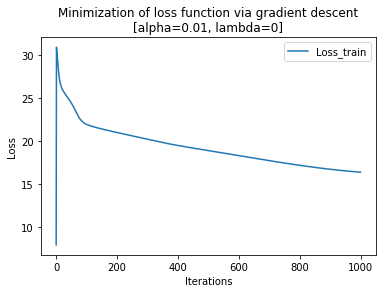

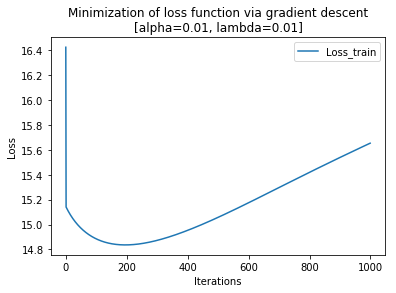

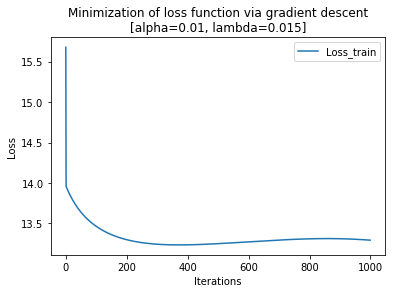

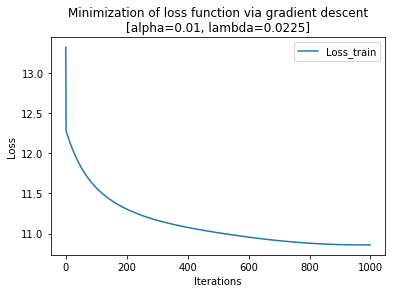

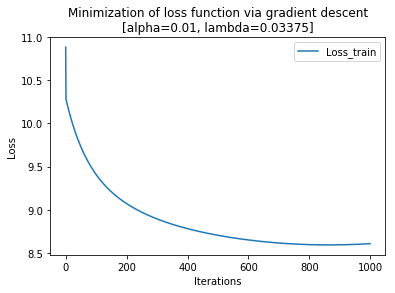

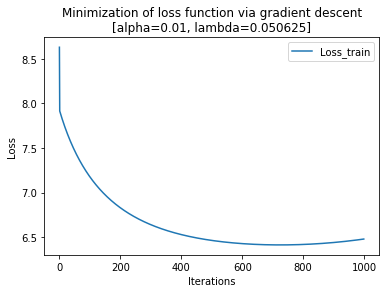

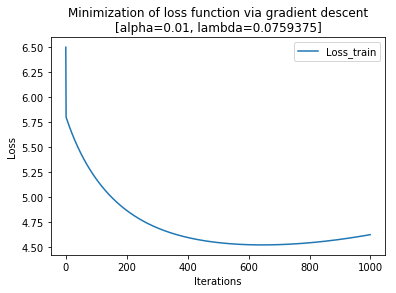

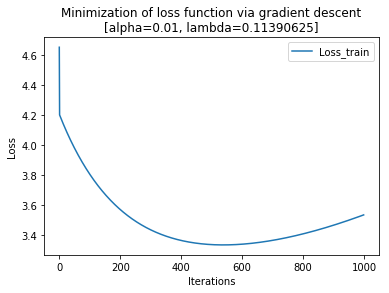

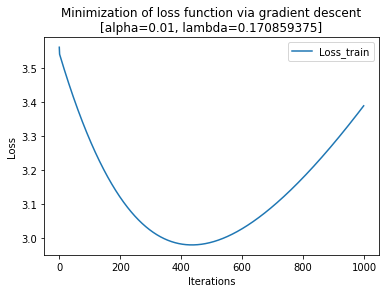

In [64]:
classifiers = [nn2.fit(X_train, y_train, alpha=0.01, lambda_param=lambda_param, plot=True) 
               for lambda_param in lambdas]

In [68]:
losses_test = [clf.loss(X_test, y_test) for clf in classifiers]

print('Funkcije gubitka za svaki klasifikator posebno na test skupu:')
for i in range(len(losses_test)):
    print(f'Klasifikator {i}: loss = {losses_test[i]}')

Funkcije gubitka za svaki klasifikator posebno na test skupu:
Klasifikator 0: loss = 16.388024432408628
Klasifikator 1: loss = 15.605781099098662
Klasifikator 2: loss = 13.20516781878266
Klasifikator 3: loss = 10.794832079697724
Klasifikator 4: loss = 8.553134415564129
Klasifikator 5: loss = 6.432771570926899
Klasifikator 6: loss = 4.5854103065633485
Klasifikator 7: loss = 3.481886061927364
Klasifikator 8: loss = 3.2919739460928237


In [72]:
min_loss = float('inf')
best_clf2 = None
best_lambda = None

for i in range(len(losses_test)):
    if losses_test[i] < min_loss:
        min_loss = losses_test[i]
        best_clf2 = classifiers[i]
        best_lambda = lambdas[i]
        
print(f'Najmanji gubitak (na test skupu) za svaki klasifikator: {min_loss}')
print(f'Regularizacioni parametar lambda za koji je naucen najbolji model: '
      f'{best_clf2.lambda_learned}')

Najmanji gubitak (na test skupu) za svaki klasifikator: 3.2919739460928237
Regularizacioni parametar lambda za koji je naucen najbolji model: 0.170859375


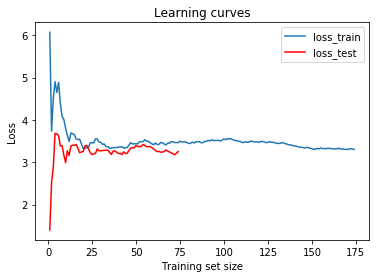

In [73]:
nc.plot_learning_curves(X_train, y_train, X_test, y_test, best_clf2)

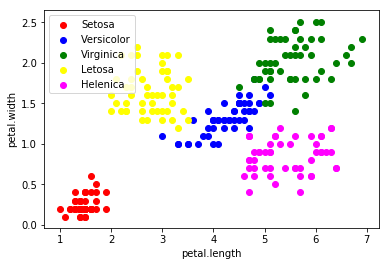

In [74]:
colors = ['red', 'blue', 'green', 'yellow', 'magenta']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)
    
plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [75]:
x1 = np.array([1, 0.5, 0.4]) # Setosa
x2 = np.array([1, 4.2, 1.2]) # Versicolor
x3 = np.array([1, 5.5, 2]) # Virginca
x4 = np.array([1, 2.9, 1.9]) # Letosa
x5 = np.array([1, 5.2, 0.8]) # Helenica

In [76]:
y_predict1 = best_clf2.predict(x1)
y_predict2 = best_clf2.predict(x2)
y_predict3 = best_clf2.predict(x3)
y_predict4 = best_clf2.predict(x4)
y_predict5 = best_clf2.predict(x5)

print('~ TESTIRANJE KLASIFIKATORA ~')

print('Test 1:')
nc.Classifier.prediction_info(y_predict1, class_to_name_dict)
print()

print('Test 2:')
nc.Classifier.prediction_info(y_predict2, class_to_name_dict)
print()

print('Test 3:')
nc.Classifier.prediction_info(y_predict3, class_to_name_dict)
print()

print('Test 4:')
nc.Classifier.prediction_info(y_predict4, class_to_name_dict)
print()

print('Test 5:')
nc.Classifier.prediction_info(y_predict5, class_to_name_dict)
print()

~ TESTIRANJE KLASIFIKATORA ~
Test 1:
Prediction vector: [0.53154471 0.39428525 0.13191369 0.0104929  0.10886497]
Max prediction value: 0.53154471360866 (atposition 0)
Class: Setosa

Test 2:
Prediction vector: [0.53003356 0.39666228 0.132364   0.0105142  0.10897653]
Max prediction value: 0.5300335642946037 (atposition 0)
Class: Setosa

Test 3:
Prediction vector: [0.52946037 0.39756519 0.1325351  0.01052229 0.1090189 ]
Max prediction value: 0.5294603656699176 (atposition 0)
Class: Setosa

Test 4:
Prediction vector: [0.53029784 0.39624619 0.13228518 0.01051047 0.108957  ]
Max prediction value: 0.5302978359340303 (atposition 0)
Class: Setosa

Test 5:
Prediction vector: [0.529807   0.39701913 0.13243161 0.01051739 0.10899328]
Max prediction value: 0.5298070002099459 (atposition 0)
Class: Setosa

